# Image Watermarking
## Author: Jared Gregor
### Based on "Copyright protection scheme for digial images using visual cryptography and sampling methods" by Hsu and Hou

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

### Set up variables
This python script offers methods for digitally watermarking an image. There are three base functions; Ownership Share generation, Master Share generation, and Share decoding. Sample methods are offered as examples for how to run each function. 

In [16]:
img_filename = "test_img.jpg" 
key = 12345
secret_word = "dogs"

### Generate an Ownership share of your image with a secret message

In [ ]:
ownership = OwnershipShare(img_filename, key, secret_word)

### Generate a Master share of your image to compare

In [ ]:
master = MasterShare(img_filename, key)

### Generate a Master share of an Imposter Image

In [ ]:
master = MasterShare("test_img_fake.jpg", key)

### Decode the two shares to reveil the secret word.

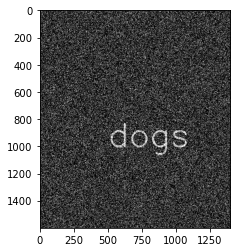

In [15]:
decoded = Decoding(ownership, master)
plt.imshow(decoded, cmap="gray")

## Cryptography Functions:

In [2]:
def MasterShare(img_filename, key):
    """ Creates a master share given an input image and a key code. """

    #variables
    src = cv2.imread(img_filename, cv2.IMREAD_GRAYSCALE)
    random.seed(key)
    sampleRate=5

    #Get average of image
    popAve = np.average(src)

    #Create share filled with zeros
    share = np.zeros((src.shape[0]*2,src.shape[1]*2))

    #Check if each pixel is higher or lower than the average and fill share
    for r in range(src.shape[0]): 
        for c in range(src.shape[1]): 
    
            #Grab 5 random pixels and take the averge of it
            sampleAve = 0 
            for i in range(sampleRate):
                #grab rand pix
                randNum = random.randint(0, (src.shape[0]*src.shape[1]-1))
                #convert pixnumber 1d to 2d
                pixRow = randNum % src.shape[0]
                pixCol = int(randNum / src.shape[0])
                #add to sample
                sampleAve += src[pixRow][pixCol]

            #Calculate Sample Average
            sampleAve = sampleAve/sampleRate

            #Fill share according to paper
            if(sampleAve < popAve):
                share[2*r+1][2*c] = 1
                share[2*r][2*c+1] = 1
            else:
                share[2*r][2*c] = 1
                share[2*r+1][2*c+1] = 1 
    return share

In [9]:
def OwnershipShare(img_filename, key, secret_word):
    """ Creates a ownership share embedded with a secret word. The key is used to seed a random number generator. """

    #variables
    src = cv2.imread(img_filename, cv2.IMREAD_GRAYSCALE)
    random.seed(key)
    sampleRate=5

    #Get average of image
    popAve = np.average(src)

    #Create share filled with zeros
    share = np.zeros((src.shape[0]*2,src.shape[1]*2))

    #Create Secret image with text
    secret = np.zeros(src.shape)
    secret = cv2.putText(secret, secret_word, (250, int(2.5*src.shape[0] / 4)), cv2.FONT_HERSHEY_SIMPLEX, 4, 255, 6, cv2.LINE_AA)

    #Check if each pixel is higher or lower than the average and fill share
    for r in range(src.shape[0]): 
        for c in range(src.shape[1]): 
    
            #Grab 5 random pixels and take the averge of it
            sampleAve = 0 
            for i in range(sampleRate):
                #grab rand pix
                randNum = random.randint(0, (src.shape[0]*src.shape[1]-1))
                #convert pixnumber 1d to 2d
                pixRow = randNum % src.shape[0]
                pixCol = int(randNum / src.shape[0])
                #add to sample
                sampleAve += src[pixRow][pixCol]

            #Calculate Sample Average
            sampleAve = sampleAve/sampleRate

            #Fill share according to paper
            if((secret[r][c] == 0 and sampleAve < popAve) or (secret[r][c] == 255 and sampleAve >= popAve)):
                share[2*r+1][2*c] = 1
                share[2*r][2*c+1] = 1
            else:
                share[2*r][2*c] = 1
                share[2*r+1][2*c+1] = 1 
    return share

In [10]:
def Decoding(ownership, master):
    """ Decodes a secret message embedded in the ownership share given a master share. Both shares are binary. """

    #Create empty dst and fill with XOR operator
    dst = np.zeros(ownership.shape)
    for r in range(ownership.shape[0]): 
        for c in range(ownership.shape[1]): 
            if(master[r][c] != ownership[r][c]):
                dst[r][c] = 255
    return dst